# Dataset

Dataset is a CSV file obtained from Kaggel https://www.kaggle.com/austinreese/craigslist-carstrucks-data on vehicle prices scrapped from Craigslist - USA.  It contains most of the relevant information on car sales including columns like price, condition, manufacturer, odometer, transmition, location etc. 


# Business Question


What factors drive car price.



# Why ask this question

Pricing may be used to structure a business model and maximise sales margins. 

Insights on which vehicles are selling may be used to optimise vehicle stocks by car traders and improve cashflow and profit.


In [271]:
# import required librabries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
from scipy import stats

%matplotlib inline

### Wrangle


In [272]:
# read csv file to DataFrame and assign to df

df = pd.read_csv('vehicles.csv')

In [273]:
# shape of dataframe
df.shape

(458213, 26)

<AxesSubplot:>

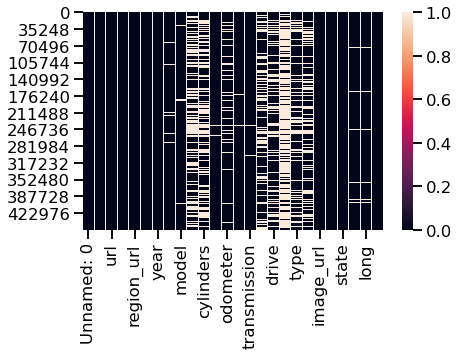

In [274]:
sns.heatmap(df.isnull())

In [275]:
# list columns
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [276]:
# drop undesired columns
# these are columns which i feel do not offer any value to the anlysis  or are duplicate forms of the same information

df.drop(['Unnamed: 0', 'id', 'url','region', 'region_url', 'image_url', 'VIN','posting_date', 'description', 'paint_color', 'title_status', 'lat', 'long' ], axis = 1, inplace = True)

In [277]:
# view df after dropping columns
df.sample(25)


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,state
248132,3300,2010.0,chevrolet,malibu,excellent,6 cylinders,gas,171473.0,automatic,fwd,full-size,sedan,nc
398333,35990,2019.0,toyota,4runner sr5 sport utility,good,6 cylinders,gas,7850.0,other,4wd,NaN,other,va
433321,16426,2017.0,chevrolet,colorado,good,4 cylinders,gas,93951.0,automatic,rwd,full-size,truck,wi
208103,265,2017.0,nissan,rogue sv,good,NaN,gas,44699.0,automatic,NaN,NaN,other,mi
318149,22988,2011.0,cadillac,escalade leather dvd a,NaN,8 cylinders,gas,106151.0,automatic,4wd,NaN,SUV,or
290667,500,2012.0,NaN,PROGRAMS as little as $500 DOWN!,NaN,NaN,gas,NaN,automatic,NaN,NaN,NaN,nh
337902,7000,2003.0,volkswagen,jetta,excellent,4 cylinders,gas,8890.0,manual,fwd,mid-size,sedan,pa
200909,5495,2011.0,chrysler,town & country,NaN,NaN,gas,139368.0,automatic,NaN,NaN,NaN,mi
434366,9995,2011.0,buick,lacrosse cxl,excellent,6 cylinders,gas,62000.0,automatic,fwd,full-size,sedan,wi
438961,9700,2015.0,mazda,3,excellent,4 cylinders,gas,125968.0,automatic,fwd,mid-size,hatchback,ca


In [278]:
# transpose view of head
df.head().T

,0,1,2,3,4
price,35990,7500,4900,2000,19500
year,2010,2014,2006,1974,2005
manufacturer,chevrolet,hyundai,bmw,chevrolet,ford
model,corvette grand sport,sonata,x3 3.0i,c-10,f350 lariat
condition,good,excellent,good,good,excellent
cylinders,8 cylinders,4 cylinders,6 cylinders,4 cylinders,8 cylinders
fuel,gas,gas,gas,gas,diesel
odometer,32742,93600,87046,190000,116000
transmission,other,automatic,automatic,automatic,automatic
drive,rwd,fwd,NaN,rwd,4wd


In [279]:
# Transposed view of tail
df.tail().T

,458208,458209,458210,458211,458212
price,14995,17895,17900,1300,22900
year,2014,2018,2014,2008,2008
manufacturer,cadillac,hyundai,cadillac,jeep,NaN
model,srx,tucson,cts coupe awd,grand cherokee,International 4300
condition,excellent,excellent,excellent,good,NaN
cylinders,6 cylinders,4 cylinders,6 cylinders,8 cylinders,NaN
fuel,gas,gas,gas,gas,diesel
odometer,83790,31888,53000,164000,164000
transmission,automatic,automatic,automatic,automatic,automatic
drive,4wd,4wd,4wd,4wd,NaN


In [280]:
# check dtypes
df.dtypes

price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
transmission     object
drive            object
size             object
type             object
state            object
dtype: object

- Year.dtype is float. Expected to be an integer
- Cylinders.dtype is object. Expected to be integer

In [281]:
# Non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         458213 non-null  int64  
 1   year          457163 non-null  float64
 2   manufacturer  439993 non-null  object 
 3   model         453367 non-null  object 
 4   condition     265273 non-null  object 
 5   cylinders     287073 non-null  object 
 6   fuel          454976 non-null  object 
 7   odometer      402910 non-null  float64
 8   transmission  455771 non-null  object 
 9   drive         324025 non-null  object 
 10  size          136865 non-null  object 
 11  type          345475 non-null  object 
 12  state         458213 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 45.4+ MB


In [282]:
# null value sum of each variable

df.isnull().sum()

price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
transmission      2442
drive           134188
size            321348
type            112738
state                0
dtype: int64

In [283]:
# sum of null for df

df.isnull().sum().sum()

1017452

<AxesSubplot:>

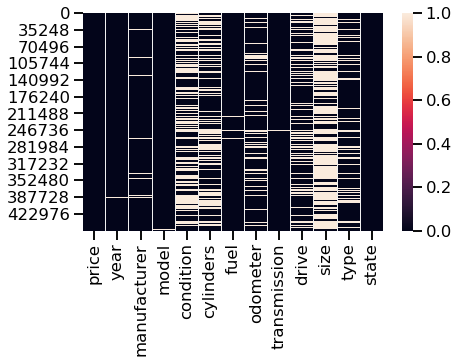

In [284]:
# heat map of null values

sns.heatmap(df.isnull())

In [285]:
# Size column has too many missing values i.e 321348. 
# dropping column

df.drop('size', axis = 1, inplace = True)

# Clean Year column

In [286]:
# View all rows with nan year values
df.loc[df.year.isna(), :]


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
15,38500,NaN,NaN,500,NaN,8 cylinders,gas,28246.0,automatic,rwd,pickup,al
383,14500,NaN,NaN,n Sentra,NaN,4 cylinders,gas,22546.0,automatic,fwd,sedan,al
469,41800,NaN,NaN,olet Silverado 2500HD,NaN,8 cylinders,diesel,80910.0,automatic,4wd,pickup,al
484,18700,NaN,NaN,Compass,NaN,4 cylinders,gas,18316.0,automatic,fwd,SUV,al
849,28900,NaN,NaN,a Highlander,NaN,6 cylinders,gas,63061.0,automatic,fwd,SUV,al
...,...,...,...,...,...,...,...,...,...,...,...,...
457714,32888,NaN,NaN,F-150,NaN,6 cylinders,gas,52965.0,automatic,4wd,pickup,wa
457761,39840,NaN,NaN,Grand Cherokee,NaN,8 cylinders,gas,28547.0,automatic,4wd,SUV,wa
457866,40880,NaN,NaN,olet Silverado 1500,NaN,8 cylinders,gas,8077.0,automatic,4wd,pickup,wa
457867,27880,NaN,NaN,des-Benz GLA,NaN,4 cylinders,gas,15015.0,automatic,fwd,SUV,wa


In [287]:
# find mean year
df.year.mean()

2010.7460665014448

In [288]:
# Imputing -  replace all missing year  values with mean
mask_year = df.year.isna()
df.loc[mask_year, 'year'] = 2010

In [289]:
# verify that year nolonger has no nan values
df.isna().sum()

price                0
year                 0
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
transmission      2442
drive           134188
type            112738
state                0
dtype: int64

In [290]:
# change year dtype from float to integer

df['year'] = df.year.astype('int64')

In [291]:
# check that year dtypes

df.dtypes

price             int64
year              int64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
transmission     object
drive            object
type             object
state            object
dtype: object

# Cleaning Odometer Column

In [292]:
# view odometer range

df.odometer.agg([min, max])

min    0.000000e+00
max    2.043756e+09
Name: odometer, dtype: float64

In [293]:
# range is too high. some values not practical
# find odo values > 1 million

odo_mask = df.odometer > 1000000
df.loc[odo_mask,'odometer']

3539      1840000.0
4743      1150000.0
5693      1340000.0
5974      2075000.0
6945      2075000.0
            ...    
451136    2331500.0
451315    1800000.0
452887    1340000.0
455197    1800000.0
458143    5666665.0
Name: odometer, Length: 388, dtype: float64

In [294]:
# drop rows with values > 1 mill

df.drop(df.loc[odo_mask,'odometer'].index, inplace = True)

In [295]:
# Check that rows with odo > 1 mil dropped
df.loc[odo_mask,'odometer']

Series([], Name: odometer, dtype: float64)

In [296]:
# view sample of rows with NaN odometer
df.loc[df.odometer.isna(), :].sample(15)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
362663,35900,2017,lexus,rx 350,NaN,NaN,gas,NaN,automatic,NaN,NaN,tn
385759,1000,2004,cadillac,escalade esv,excellent,8 cylinders,gas,NaN,automatic,NaN,SUV,tx
405879,11000,2011,bmw,328i,excellent,NaN,gas,NaN,automatic,NaN,NaN,va
20228,0,2011,chevrolet,silverado,like new,6 cylinders,gas,NaN,automatic,NaN,NaN,ar
296400,99,2008,kia,rio,NaN,NaN,gas,NaN,automatic,NaN,NaN,oh
356090,19000,2017,honda,accord sdn lx,NaN,NaN,gas,NaN,automatic,fwd,NaN,sc
304067,16995,2011,ram,1500 quad cab,NaN,NaN,gas,NaN,automatic,NaN,NaN,oh
218223,11500,1987,ford,e350 cabriolet,NaN,NaN,gas,NaN,automatic,NaN,NaN,ms
202715,14500,1959,ford,thunderbird,like new,8 cylinders,gas,NaN,automatic,NaN,NaN,mi
157667,26988,2016,ford,explorer,NaN,NaN,gas,NaN,automatic,4wd,NaN,ia


In [297]:
# count of NaN odometer values
df.odometer.isna().sum()

55303

In [298]:
# Check Mean , median, mode

print('The odometer Mean is :' + str(df.odometer.mean()) )
print('The odometer median is :' + str(df.odometer.median()))
print('the odometer mode is :' + str(df.odometer.mode()))


The odometer Mean is :93603.1338709437
The odometer median is :87520.0
the odometer mode is :0    0.0
dtype: float64


In [299]:
# list cars which are not new but have 0 odometer
df.loc[(df.odometer == 0) & (df.condition != 'new')]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
42,0,2014,ram,NaN,NaN,NaN,diesel,0.0,automatic,NaN,other,al
276,2500,2006,chevrolet,malibu,NaN,6 cylinders,gas,0.0,automatic,fwd,sedan,al
325,0,2019,NaN,Biz On Wheels,excellent,NaN,gas,0.0,automatic,NaN,NaN,al
326,0,2019,NaN,Biz On Wheels,excellent,NaN,gas,0.0,automatic,NaN,NaN,al
365,3200,2005,ford,taurus,NaN,6 cylinders,NaN,0.0,automatic,fwd,sedan,al
...,...,...,...,...,...,...,...,...,...,...,...,...
456517,22500,2016,chevrolet,silverado 1500 lt automatic,NaN,NaN,gas,0.0,automatic,rwd,pickup,tx
456796,35990,2010,mercedes-benz,s-class,NaN,NaN,gas,0.0,automatic,rwd,NaN,tx
457732,9988,2008,toyota,highlander hybrid,excellent,6 cylinders,hybrid,0.0,automatic,4wd,other,wa
457735,9988,2008,toyota,highlander hybrid,excellent,6 cylinders,hybrid,0.0,automatic,4wd,other,wa


In [300]:
#  inputing odometer zero values for cars which are not new but having a Zero odometer value - by replacing with median

odo_mask2 = (df.odometer == 0) & (df.condition != 'new')
df.loc[odo_mask2, 'odometer'] = 87520


In [301]:
# inputing odometer NaN values by replacing with median

odo_mask3 = df.odometer.isna()

df.loc[odo_mask3, 'odometer'] = 87520



In [302]:
# check odometer null values

df.odometer.isnull().sum()

0

In [303]:
df[df.odometer == 0]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
40249,22400,2020,toyota,prius le,new,NaN,hybrid,0.0,automatic,NaN,NaN,ca
60199,86995,2020,ford,transit,new,NaN,gas,0.0,other,NaN,NaN,ca
86989,3200,1972,volkswagen,bus,new,4 cylinders,gas,0.0,manual,NaN,bus,fl
90084,1,2021,chevrolet,corvette,new,8 cylinders,gas,0.0,automatic,rwd,NaN,fl
104012,1600,2006,chevrolet,corvette,new,8 cylinders,gas,0.0,manual,rwd,coupe,fl
113156,9900,2008,chevrolet,silverado 1500,new,8 cylinders,gas,0.0,automatic,rwd,truck,fl
113171,9900,2007,gmc,yukon,new,8 cylinders,gas,0.0,automatic,rwd,SUV,fl
113185,10900,2012,honda,odyssey,new,6 cylinders,gas,0.0,automatic,fwd,mini-van,fl
113187,6900,2009,acura,tl,new,6 cylinders,gas,0.0,automatic,fwd,sedan,fl
113191,8900,2009,chevrolet,silverado 1500,new,8 cylinders,gas,0.0,automatic,4wd,truck,fl


In [304]:
#drop remaining columns with odometer = 0
df.drop(df.loc[df.odometer == 0, 'odometer'].index, inplace = True)

# Cleaning Price Column

In [305]:
# check min, max of price
df.price.agg([min, max])

min             0
max    3615215112
Name: price, dtype: int64

In [306]:
# view cars above 250000 and assess how to clean
pd.options.display.max_rows = 80
high_price = df[df.price > 250000]
high_price


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
1622,1234567890,1955,chevrolet,NaN,NaN,NaN,gas,87520.0,automatic,NaN,NaN,al
21955,1234567,1955,chevrolet,NaN,NaN,NaN,other,87520.0,other,NaN,NaN,ar
25413,11111111,2007,nissan,pathfinder,NaN,NaN,gas,150000.0,automatic,4wd,NaN,ca
38375,2808348671,2020,gmc,NaN,NaN,8 cylinders,gas,87520.0,automatic,NaN,NaN,ca
39335,599000,2020,toyota,NaN,NaN,NaN,other,87520.0,other,NaN,NaN,ca
41703,279888,2017,ferrari,488 spider,like new,8 cylinders,gas,5900.0,automatic,NaN,NaN,ca
42435,269888,2020,NaN,lamborghini urus,like new,8 cylinders,gas,7500.0,automatic,4wd,NaN,ca
51130,339998,2018,NaN,LAMBORGHINI AVENTADOR,NaN,NaN,gas,5915.0,automatic,NaN,coupe,ca
53582,285888,2017,ferrari,488 spider,NaN,8 cylinders,gas,2862.0,automatic,rwd,convertible,ca
55387,888777,2005,toyota,land cruiser,NaN,NaN,gas,99999.0,manual,NaN,NaN,ca


In [307]:
# dropping rows with car prices > 250000

df.drop(df.loc[df.price > 250000, 'price'].index, inplace = True)

# check max price to confirm
df.price.max()

249995

In [308]:
df.price.describe()

count    457725.000000
mean      14832.012822
std       13991.293515
min           0.000000
25%        4900.000000
50%       10995.000000
75%       21495.000000
max      249995.000000
Name: price, dtype: float64

In [309]:
# min price of $0 is an unormally
# view cars with price less that $500
df[df.price < 500]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
9,490,2019,ford,transit connect wagon xlt,excellent,4 cylinders,gas,4775.0,automatic,NaN,van,al
25,0,2016,chevrolet,silverado 1500 lt z71,NaN,8 cylinders,other,29458.0,automatic,4wd,truck,al
42,0,2014,ram,NaN,NaN,NaN,diesel,87520.0,automatic,NaN,other,al
102,4,1961,ford,falcon,NaN,NaN,gas,88000.0,manual,NaN,NaN,al
171,0,2014,NaN,Freightliner Cascadia,NaN,NaN,diesel,1000.0,automatic,NaN,NaN,al
...,...,...,...,...,...,...,...,...,...,...,...,...
458122,0,2017,cadillac,xt5,excellent,NaN,gas,71714.0,automatic,fwd,SUV,wi
458153,0,2016,toyota,sequoia platinum 4x4,excellent,8 cylinders,gas,98059.0,automatic,4wd,SUV,wi
458154,0,2015,jeep,wrangler unlimited sahara,excellent,6 cylinders,gas,70885.0,automatic,4wd,SUV,wi
458177,0,2007,toyota,sequoia limited,NaN,NaN,gas,198000.0,automatic,NaN,NaN,wi


In [310]:
# drop price columns with price < $500

df.drop(df.loc[df.price < 500, 'price'].index, inplace = True)

In [311]:
df.price.describe()

count    414474.000000
mean      16374.929774
std       13819.864999
min         500.000000
25%        6300.000000
50%       12899.000000
75%       22995.000000
max      249995.000000
Name: price, dtype: float64

# Cleaning Cylinder column and converting dtype to 'int64'

In [312]:
# see unique cyilinder values
df.cylinders.unique()

array(['8 cylinders', '4 cylinders', '6 cylinders', nan, '10 cylinders',
       'other', '5 cylinders', '3 cylinders', '12 cylinders'],
      dtype=object)

In [313]:
# replace cylinders list with number

df.cylinders.replace('8 cylinders', 8, inplace = True)
df.cylinders.replace('4 cylinders', 4, inplace = True)
df.cylinders.replace('6 cylinders', 6, inplace = True)
df.cylinders.replace('10 cylinders', 10, inplace = True)
df.cylinders.replace('5 cylinders', 5, inplace = True)
df.cylinders.replace('3 cylinders', 3, inplace = True)
df.cylinders.replace('12 cylinders', 12, inplace = True)

# check cylinders values
df.cylinders.unique()

array([8, 4, 6, nan, 10, 'other', 5, 3, 12], dtype=object)

In [314]:
df.cylinders.dtype


dtype('O')

In [315]:
df[df.cylinders == 'other']

#observation cylinders - other includes electric vehicles
#observation rows with model - SPECIAL FINANCE PROGRAM 2020 offer no value (noise). Recent year but low value.

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
275,500,2020,NaN,SPECIAL FINANCE PROGRAM 2020,excellent,other,other,87520.0,other,NaN,bus,al
388,1000,2020,NaN,SPECIAL FINANCE PROGRAM 2020,excellent,other,other,87520.0,other,NaN,bus,al
617,1000,2020,NaN,SPECIAL FINANCE PROGRAM 2020,excellent,other,other,87520.0,other,NaN,bus,al
703,1000,2020,NaN,SPECIAL FINANCE PROGRAM 2020,excellent,other,other,87520.0,other,NaN,bus,al
777,1000,2020,NaN,SPECIAL FINANCE PROGRAM 2020,excellent,other,other,87520.0,other,NaN,bus,al
...,...,...,...,...,...,...,...,...,...,...,...,...
453957,1400,1998,honda,accord,fair,other,gas,150000.0,automatic,NaN,sedan,ny
455276,11999,2016,volkswagen,e-golf,NaN,other,electric,33000.0,automatic,fwd,hatchback,or
455831,19995,2011,ford,f350 4x4,good,other,gas,72069.0,automatic,4wd,truck,pa
455988,4600,2012,nissan,leaf,excellent,other,electric,58650.0,automatic,fwd,hatchback,sc


In [316]:
# checking how many model == 'SPECIAL FINANCE PROGRAM 2020'

df[df.model == 'SPECIAL FINANCE PROGRAM 2020'].count()

price           13
year            13
manufacturer     0
model           13
condition       13
cylinders       13
fuel            13
odometer        13
transmission    13
drive            0
type            13
state           13
dtype: int64

In [317]:
# drop rows with model - SPECIAL FINANCE PROGRAM 2020

model_mask = df.model == 'SPECIAL FINANCE PROGRAM 2020'

df.drop(df.loc[model_mask, 'model'].index, inplace = True)

# recheck count to confirm successful row drop

df[df.model == 'SPECIAL FINANCE PROGRAM 2020'].count()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
type            0
state           0
dtype: int64

In [318]:
# view electric vehicles
df[df.fuel == 'electric']

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
454,38990,2018,tesla,model 3 long range sedan,good,NaN,electric,17399.0,other,rwd,sedan,al
462,33990,2018,tesla,model 3 mid range sedan 4d,good,NaN,electric,47215.0,other,rwd,sedan,al
474,30990,2012,tesla,model s sedan 4d,good,NaN,electric,58708.0,other,rwd,sedan,al
708,38990,2013,tesla,model s,NaN,NaN,electric,69961.0,automatic,rwd,sedan,al
1057,38590,2019,tesla,model 3 standard range,good,NaN,electric,6084.0,other,rwd,sedan,al
...,...,...,...,...,...,...,...,...,...,...,...,...
457437,20990,2018,bmw,i3 base w/range extender,good,NaN,electric,23927.0,other,rwd,hatchback,va
457648,6499,2013,nissan,leaf,NaN,NaN,electric,41832.0,automatic,fwd,hatchback,wa
458200,13990,2014,bmw,i3 hatchback 4d,good,NaN,electric,28446.0,other,rwd,hatchback,wi
458201,14590,2015,bmw,i3 hatchback 4d,good,NaN,electric,16347.0,other,rwd,hatchback,wi


In [319]:
# asign electric vehicles - cylinders to 0

electric_mask = df.fuel == 'electric'

df.loc[electric_mask, 'cylinders'] = 0

#Check cylinders value counts 
df.cylinders.value_counts()

# observation 4, 6, 8 cylinders are most common

6        98247
4        86713
8        74044
0         2248
5         1983
10        1146
other      698
3          491
12         169
Name: cylinders, dtype: int64

In [320]:
df.type.value_counts()

# Observation sedans are the most common cars

sedan          82864
SUV            71762
pickup         41001
truck          30118
other          21571
coupe          17701
hatchback      15159
wagon           9674
van             8707
convertible     6473
mini-van        5966
offroad          627
bus              576
Name: type, dtype: int64

In [321]:
# since observation 4, 6, 8 cylinders are most common with figures in the same order. it would create bias to 
# impute the cylinders with value 'other'.
# droping rows with cylinders - other

cylinders_mask2 = df.cylinders == 'other'
df.drop(df.loc[cylinders_mask2].index, inplace = True)

# check cylinder value counts to confirm successful drop

df.cylinders.value_counts()

6     98247
4     86713
8     74044
0      2248
5      1983
10     1146
3       491
12      169
Name: cylinders, dtype: int64

In [322]:
df.cylinders.isnull().sum()

# cylinder null values is high. 
# For the purposes of academic illustration and progress I shall dorp all rows with null in order to get a correlation with ....

148722

In [323]:
# Droping rows with cylinders - NaN

cylinders_mask3 = df.cylinders.isnull()
df.drop(df.loc[cylinders_mask3].index, inplace = True)

# rechek cyliner nulls

df.cylinders.isnull().sum()

0

In [324]:
# change cylinder dtype from object to integer

df['cylinders'] = df.cylinders.astype('int64')

df.cylinders.unique()

array([ 8,  4,  6, 10,  0,  5,  3, 12], dtype=int64)

# Cleaning Condition column and assigning dummy variables

In [325]:
df.condition.unique()

array(['good', 'excellent', nan, 'like new', 'salvage', 'fair', 'new'],
      dtype=object)

In [326]:
df.condition.value_counts()

good         87336
excellent    85287
like new     19558
fair          6334
new            891
salvage        490
Name: condition, dtype: int64

In [327]:
df.condition.isnull().sum()

65145

In [328]:
null_cond = df.loc[df.condition.isnull()]
null_cond


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
15,38500,2010,NaN,500,NaN,8,gas,28246.0,automatic,rwd,pickup,al
82,8500,2012,chevrolet,equinox lt,NaN,4,gas,139333.0,automatic,fwd,SUV,al
90,3400,2010,ford,focus,NaN,4,gas,151269.0,automatic,fwd,sedan,al
100,3900,2008,honda,odyssey,NaN,6,gas,180211.0,automatic,fwd,van,al
103,28900,2014,toyota,tundra,NaN,8,gas,55000.0,automatic,rwd,NaN,al
...,...,...,...,...,...,...,...,...,...,...,...,...
458146,1950,2006,ford,explorer,NaN,6,gas,192136.0,automatic,4wd,SUV,wi
458152,11500,2002,chevrolet,silverado 2500hd duramax,NaN,8,diesel,362000.0,automatic,4wd,truck,wi
458157,1300,2004,dodge,durango rt,NaN,8,gas,200000.0,automatic,NaN,NaN,wi
458175,6997,2006,toyota,rav4,NaN,6,gas,174866.0,automatic,fwd,SUV,wi


In [329]:
df.condition.describe()

count     199896
unique         6
top         good
freq       87336
Name: condition, dtype: object

In [330]:
# the counts of condition 2 & 3 (excellent & good) are very similar.
# i shall split the propotion of null.conditions proportionally between these two categories (49:51)

cond_good_prop = 0.49*len(null_cond)
cond_good_na=np.round(cond_good_prop,0)
cond_good_na

31921.0

In [331]:
a = null_cond.sample(38131)
a

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
387908,31995,2014,ford,f250 super duty crew cab,NaN,8,diesel,221788.0,automatic,4wd,pickup,tx
365432,14699,2014,ford,edge,NaN,6,gas,63426.0,automatic,fwd,SUV,tn
160511,11500,2010,lexus,es 350,NaN,6,gas,87520.0,automatic,NaN,NaN,ia
172507,23999,2015,gmc,sierra 1500 sle,NaN,8,gas,122010.0,automatic,4wd,NaN,la
220639,19250,2014,chevrolet,silverado 1500,NaN,6,other,124269.0,automatic,NaN,pickup,mo
...,...,...,...,...,...,...,...,...,...,...,...,...
423253,32500,2015,ford,f-350,NaN,8,diesel,152000.0,automatic,4wd,pickup,wv
307479,42995,2019,ford,super duty f-350 srw,NaN,8,gas,85597.0,automatic,4wd,truck,oh
84013,13990,2012,chevrolet,express passenger,NaN,8,gas,63777.0,automatic,NaN,NaN,dc
250936,71450,2017,tesla,model x p100d,NaN,0,electric,13399.0,automatic,4wd,NaN,ne


In [332]:
# from sample a - imputing condition NaN to 'good'

cond_mask = a.condition.isnull()
a.loc[cond_mask, 'condition'] = 'good'

# obtain indexes of updated rows
a.index

Int64Index([387908, 365432, 160511, 172507, 220639,  26489,  10302, 287724,
             82498,  39113,
            ...
            297492, 144153,  89062, 324871, 103857, 423253, 307479,  84013,
            250936, 105550],
           dtype='int64', length=38131)

In [333]:
# update df with reassigned/imputed condition 2
df.update(a, overwrite = True )

In [334]:
# imputing remainder of NaN condition to 'excellent'

cond_mask = df.condition.isnull()
df.loc[cond_mask, 'condition'] = 'excellent'

# check condition value counts
df.condition.value_counts()


good         125467
excellent    112301
like new      19558
fair           6334
new             891
salvage         490
Name: condition, dtype: int64

In [335]:
# check all NaN values have been cleaned
df.condition.isna().sum()

0

In [336]:

#Check 

df.dtypes

price           float64
year            float64
manufacturer     object
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
drive            object
type             object
state            object
dtype: object

# Cleaning Drive column and assigning dummy variables

In [337]:
# check unique values of drive
df.drive.unique()

array(['rwd', 'fwd', nan, '4wd'], dtype=object)

In [338]:
# drive value_counts
df.drive.value_counts()

4wd    97383
fwd    83488
rwd    48943
Name: drive, dtype: int64

In [339]:
# drive null values
df.drive.isnull().sum()

35227

In [340]:
# Drop rows with null drive values

drive_mask = df.drive.isnull()
df.drop(df.loc[drive_mask, 'drive'].index, inplace = True)

# check to confirm row have dropped
df.drive.isnull().sum()

0

# Clean Fuel Column

In [341]:
df.fuel.unique()

array(['gas', 'diesel', 'hybrid', 'other', nan, 'electric'], dtype=object)

In [342]:
df.fuel.value_counts()

gas         204806
diesel       14747
other         4218
hybrid        3184
electric      1787
Name: fuel, dtype: int64

In [343]:
df.fuel.isna().sum()

1072

In [344]:
# Drop fuel NaN values 
fuel_mask = df.fuel.isnull()
df.drop(df.loc[fuel_mask, 'fuel'].index, inplace = True)

# Check null values
df.fuel.isna().sum()

0

In [345]:
# replace other fuel type with mode i.e. gas
df.fuel.replace(to_replace = 'other', value = 'gas', inplace = True)

In [346]:
df[df.fuel == 'other']

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state


## droping remaining Nan values

In [347]:
df.isna().sum()

price               0
year                0
manufacturer     7992
model            1496
condition           0
cylinders           0
fuel                0
odometer            0
transmission       47
drive               0
type            22003
state               0
dtype: int64

In [348]:
#Drop NaN transmission 

trans_mask = df.transmission.isna()

df.drop(df.loc[trans_mask,'transmission'].index, inplace = True)

In [349]:
# Drop NaN manufacturer

man_mask = df.manufacturer.isna()

df.drop(df.loc[man_mask, 'manufacturer'].index, inplace = True)


In [350]:
# Drop NaN Model

mod_mask = df.model.isna()

df.drop(df.loc[mod_mask, 'model'].index, inplace = True)

In [351]:
# Drop NaN type

type_mask = df.type.isna()

df.drop(df.loc[type_mask, 'type'].index, inplace = True)

In [352]:
# check that all NaN values have been cleaned
df.isna().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
type            0
state           0
dtype: int64

In [353]:
# check cleaned dataFrame shape

df.shape

(198518, 12)

<AxesSubplot:>

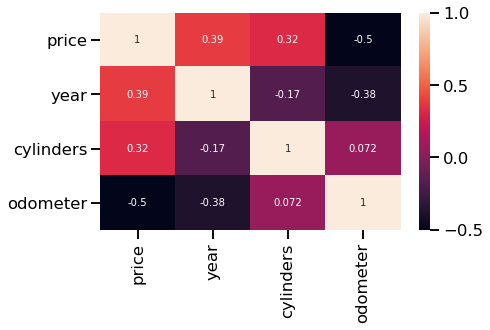

In [354]:
# view correlation heatmap
sns.heatmap(df.corr(), annot = True)

# Bussiness Answer  / Insight

## Question: which variables affect price and how?



### Price to odometer
-0.5 Corr
-ve Corr
the lower the odometer the higher the price


### price to Cylinders
0.32 Corr
moderate +ve
price increases with increace in number of cylinders


### Price to Year
0.39 Corr
newer veichles tend to be have higher price



In [355]:
df.describe()

,price,year,cylinders,odometer
count,198518.000000,198518.000000,198518.000000,198518.000000
mean,16029.544731,2010.644581,5.841778,97840.971489
std,13208.628023,8.020814,1.686156,63252.759795
min,500.000000,1913.000000,0.000000,1.000000
25%,6300.000000,2007.000000,4.000000,49147.000000
50%,12000.000000,2012.000000,6.000000,89134.000000
75%,22900.000000,2016.000000,8.000000,136000.000000
max,235000.000000,2021.000000,12.000000,1000000.000000


Text(0.5, 1.0, 'Regplot - odometer Vs Price')

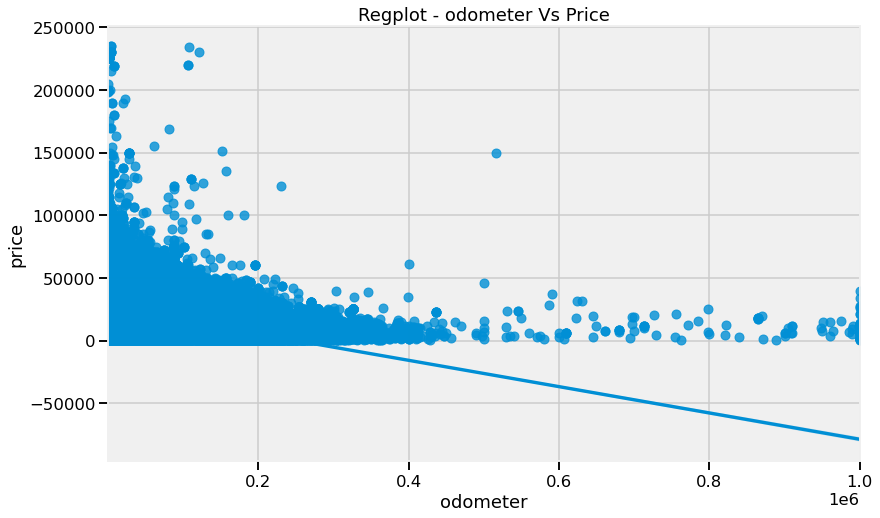

In [356]:
# regplot Odometer Vs Price
plt.figure(figsize = (12,8))
sns.set_context('talk')
sns.regplot(y = 'price', x = 'odometer',data = df)
plt.title('Regplot - odometer Vs Price')

In [357]:
# caluculate intercept & coefficient for line of best fit
np.polyfit( y = df.price, x = df.odometer, deg = 1)

array([-1.05003215e-01,  2.63031613e+04])

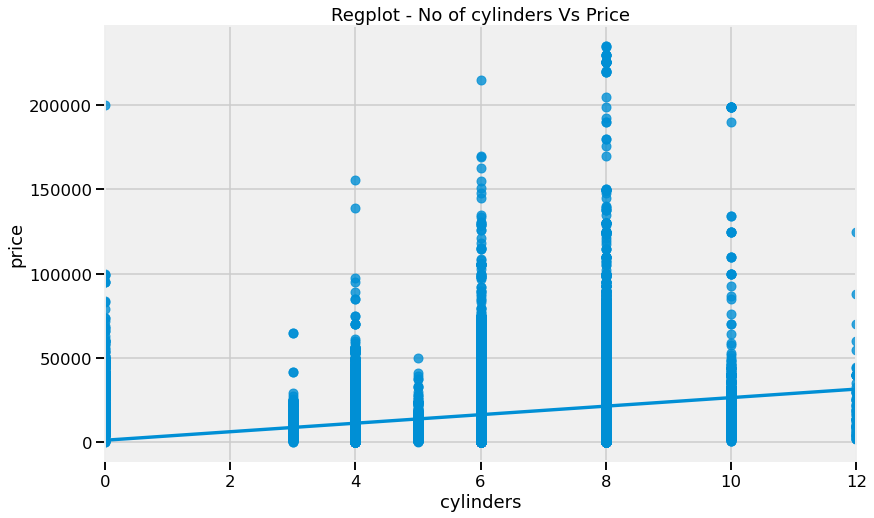

In [358]:
# regplot No of cylinders Vs Price
plt.figure(figsize = (12,8))
sns.set_context('talk')
sns.regplot(y = 'price', x = 'cylinders',data = df)
plt.title('Regplot - No of cylinders Vs Price')
plt.show()

In [359]:
# calculate coef and intercept for regrssion line
np.polyfit( y = df.price, x = df.cylinders, deg = 1)

array([2529.41724483, 1253.25180088])

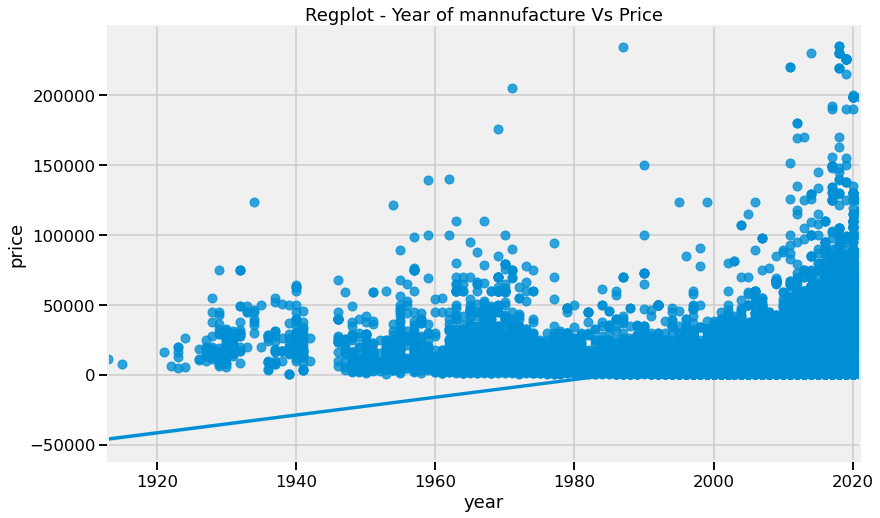

In [360]:
# regplot Year of manufacture Vs Price
plt.figure(figsize = (12,8))
sns.set_context('talk')
sns.regplot(y = 'price', x = 'year',data = df)

plt.title('Regplot - Year of mannufacture Vs Price')
plt.show()

In [361]:
# Calculate coeficient and intercept for reg line.
np.polyfit( y = df.price, x = df.year, deg = 1)

array([ 6.35958117e+02, -1.26265620e+06])

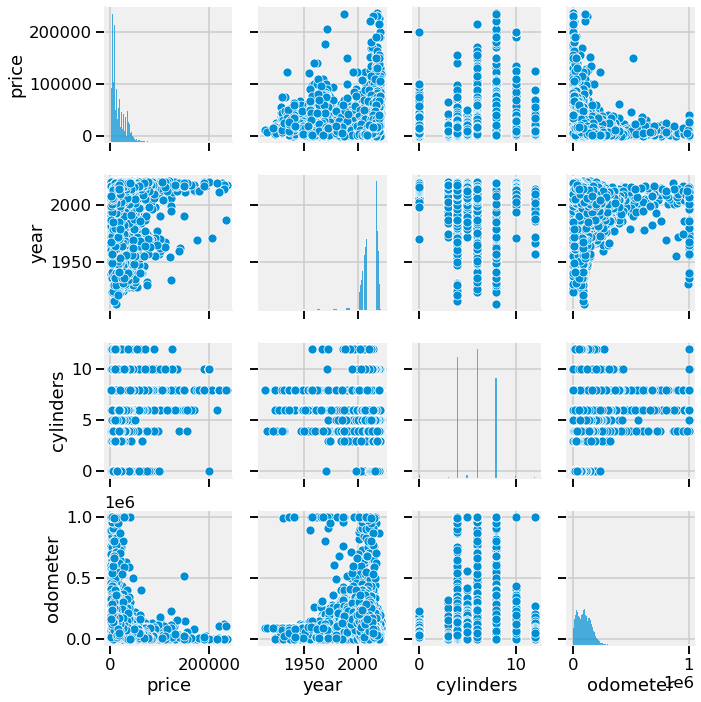

In [362]:
sns.pairplot(df)

# Some Statistical values & Visualisation

In [363]:
df.describe()

,price,year,cylinders,odometer
count,198518.000000,198518.000000,198518.000000,198518.000000
mean,16029.544731,2010.644581,5.841778,97840.971489
std,13208.628023,8.020814,1.686156,63252.759795
min,500.000000,1913.000000,0.000000,1.000000
25%,6300.000000,2007.000000,4.000000,49147.000000
50%,12000.000000,2012.000000,6.000000,89134.000000
75%,22900.000000,2016.000000,8.000000,136000.000000
max,235000.000000,2021.000000,12.000000,1000000.000000


In [364]:
df.mode()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
0,6995.0,2017.0,ford,f-150,good,6.0,gas,87520.0,automatic,4wd,sedan,ca


In [365]:
# manufacture counts
pd.options.display.max_rows = 50     
man = df.manufacturer.value_counts()
man

ford               34817
chevrolet          30048
toyota             18305
honda              11947
jeep               10855
nissan             10834
dodge               7611
ram                 7600
gmc                 7593
bmw                 5524
hyundai             4855
mercedes-benz       4854
subaru              4487
volkswagen          4205
kia                 3938
lexus               3534
chrysler            3488
cadillac            3124
buick               2409
mazda               2354
audi                2102
acura               1867
infiniti            1530
lincoln             1474
pontiac             1387
volvo               1172
mitsubishi          1102
mini                 936
mercury              817
rover                755
porsche              683
saturn               667
tesla                602
jaguar               537
fiat                 336
alfa-romeo            65
ferrari               29
datsun                23
harley-davidson       21
land rover            17


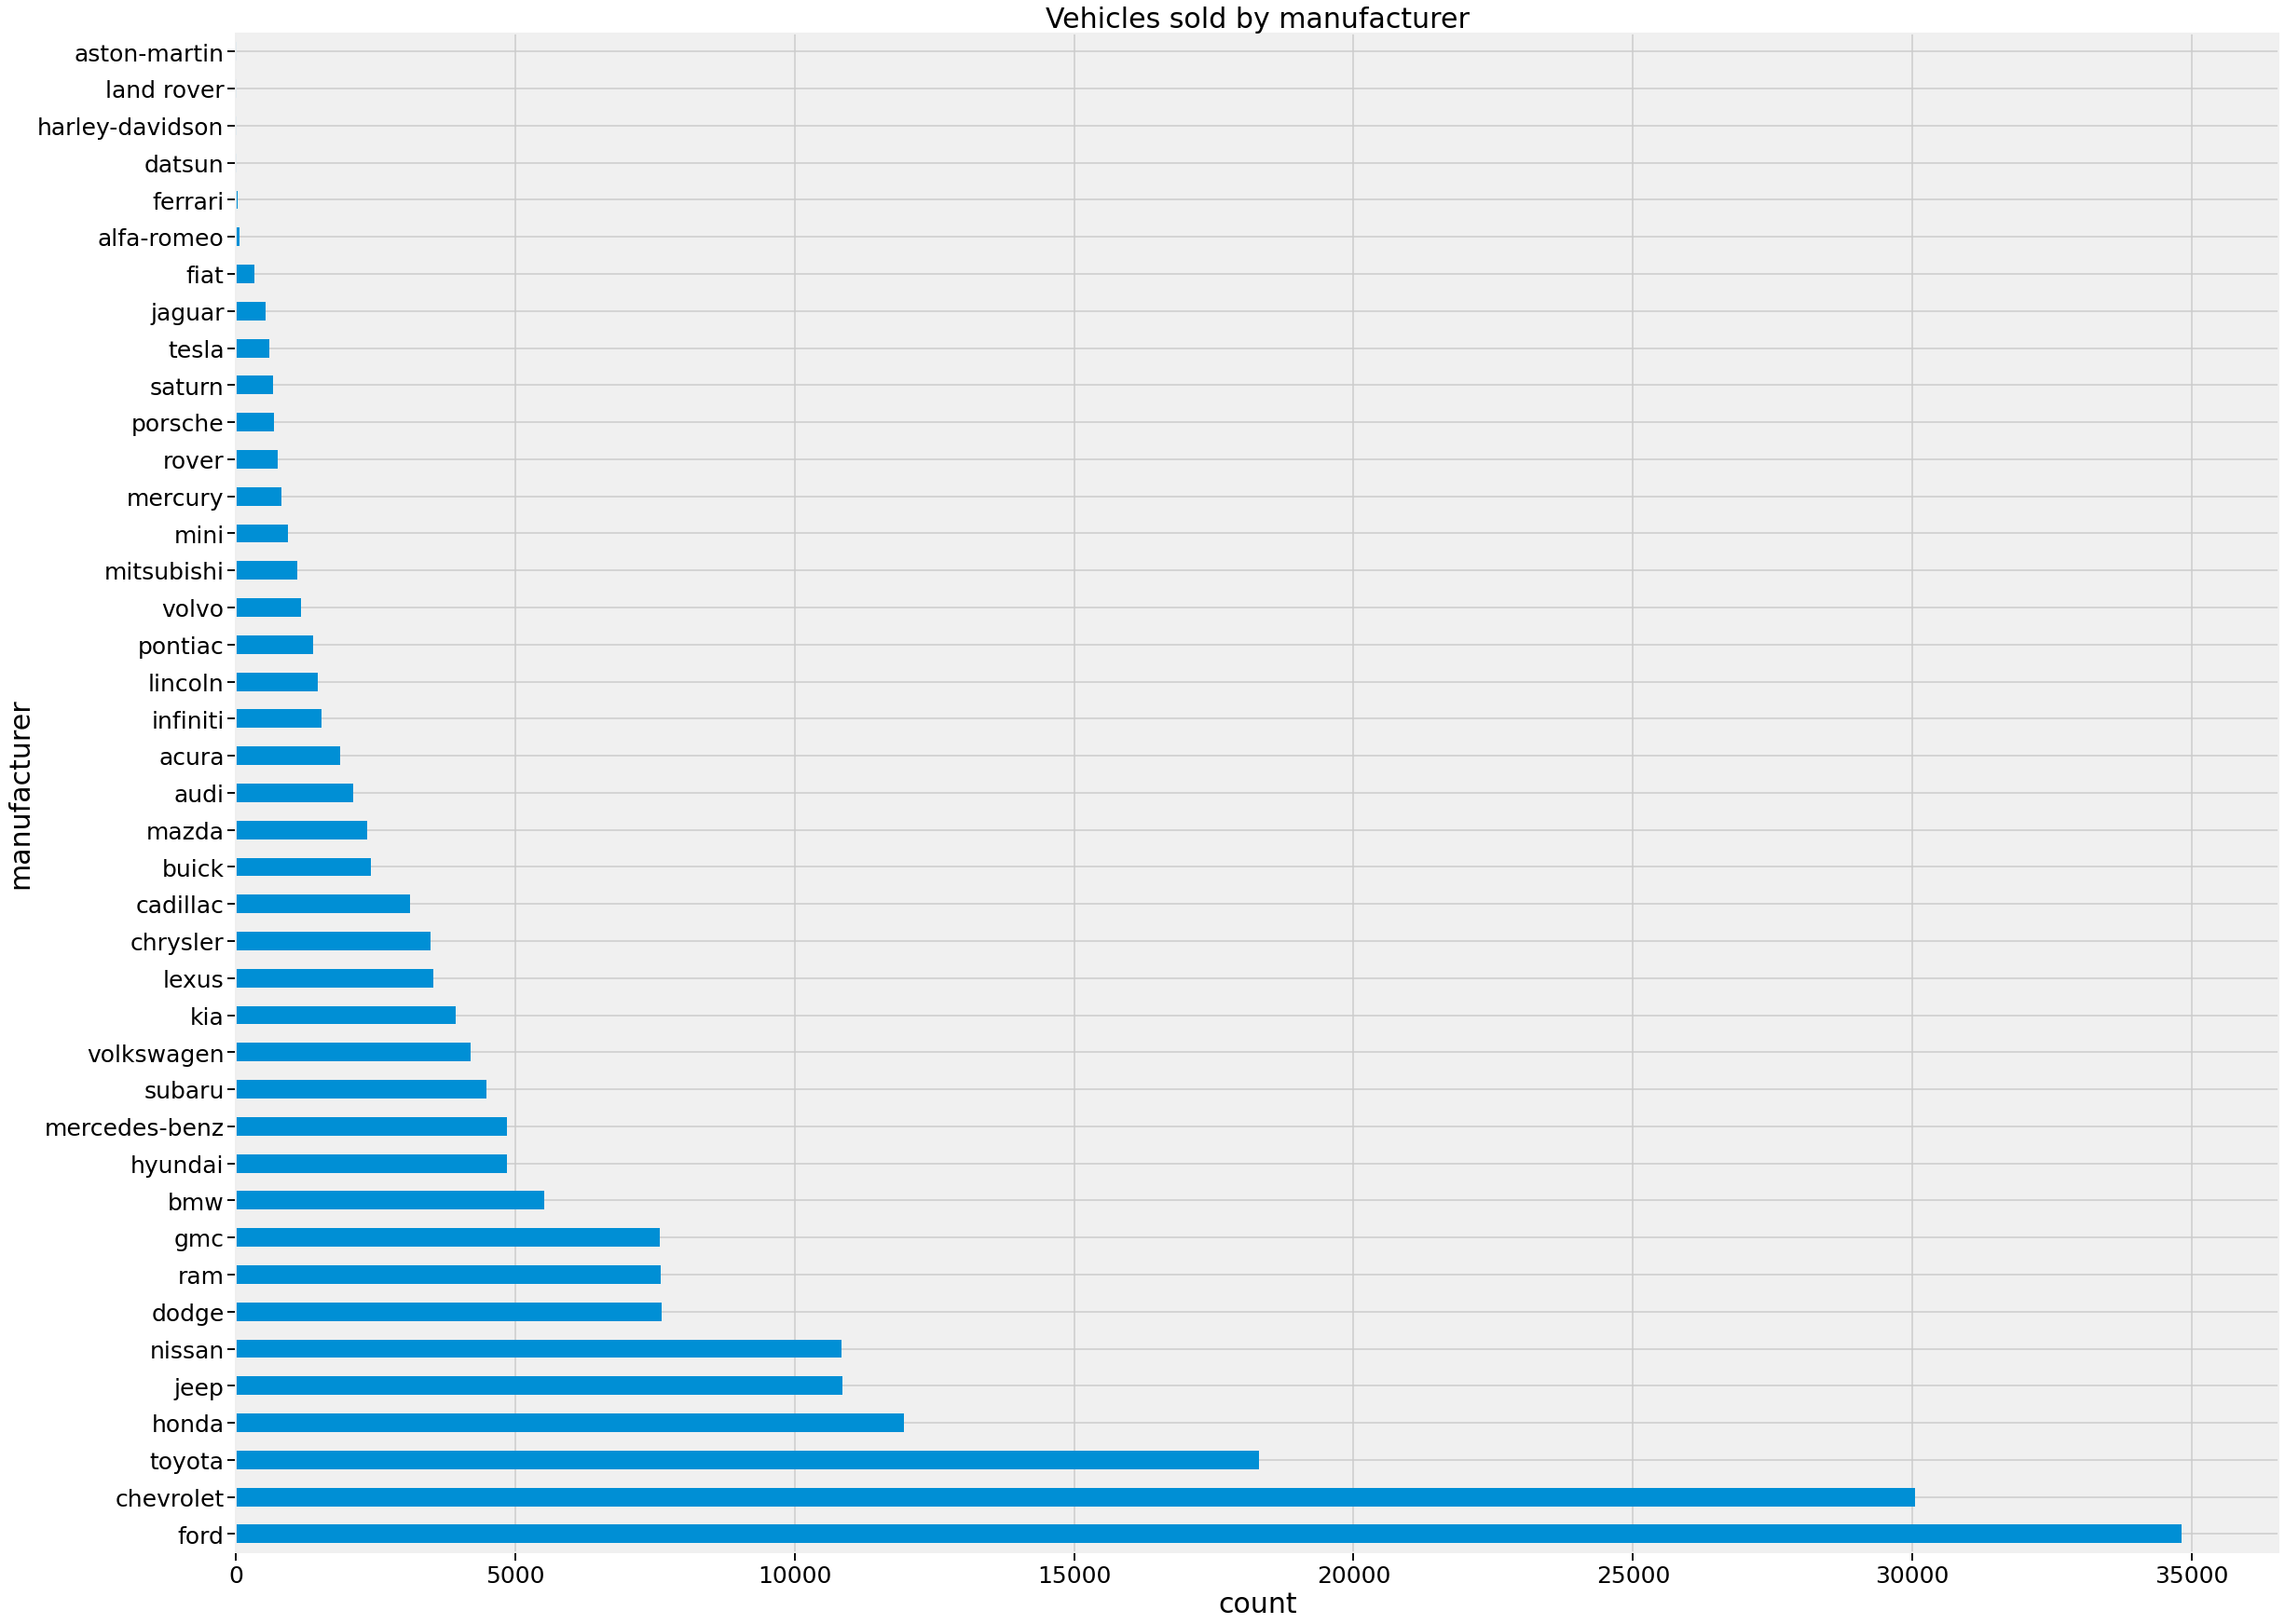

In [366]:
# plot manufature Vs number of vehicles

plt.figure(figsize = (35,30))
sns.set_context('talk')
man.plot.barh()
plt.ylabel('manufacturer', size = 30)
plt.xlabel('count', size = 30)
plt.title('Vehicles sold by manufacturer', size = 30)
plt.yticks(fontsize = 25)
plt.xticks(fontsize =25)
plt.show()

In [367]:
df.model.value_counts()

f-150                3369
silverado 1500       2689
1500                 1879
camry                1789
accord               1679
                     ... 
200sx se-r              1
beetle se turbo         1
roadmaster 8            1
benz e250 bluetec       1
duramax silverado       1
Name: model, Length: 15274, dtype: int64

In [368]:
df[df.model== '1500']

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
566,14980.0,2005.0,ram,1500,good,8.0,gas,74655.0,automatic,4wd,truck,al
612,14980.0,2005.0,ram,1500,good,8.0,gas,74655.0,automatic,4wd,truck,al
1107,17900.0,2015.0,ram,1500,good,8.0,gas,136327.0,automatic,rwd,truck,al
2244,4000.0,2002.0,ram,1500,good,6.0,gas,176537.0,automatic,rwd,truck,al
2831,6500.0,2003.0,ram,1500,excellent,8.0,gas,152300.0,automatic,rwd,pickup,al
...,...,...,...,...,...,...,...,...,...,...,...,...
456389,17990.0,2017.0,ram,1500,excellent,8.0,gas,52919.0,automatic,rwd,pickup,tn
457403,3000.0,2004.0,ram,1500,fair,8.0,gas,191000.0,automatic,4wd,pickup,vt
457889,7995.0,2007.0,ram,1500,good,8.0,gas,60000.0,automatic,4wd,truck,wv
457984,24883.0,2017.0,ram,1500,good,8.0,gas,172788.0,automatic,4wd,truck,wi


In [369]:
# rename model 1500 to 'Ram 1500' for clarity of model name Vs Siverado 1500

df.model.replace(to_replace= '1500' ,value = 'Ram 1500', inplace = True) 


In [370]:
# top 20 models
m = df.model.value_counts()
models = pd.DataFrame(m)
top_models = models.head(20)
top_models

,model
f-150,3369
silverado 1500,2689
Ram 1500,1879
camry,1789
accord,1679
escape,1646
civic,1475
altima,1444
corolla,1237
explorer,1222


<Figure size 2520x2160 with 0 Axes>

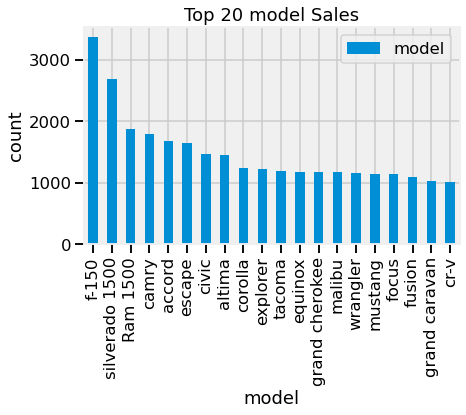

In [371]:
# plot sales of top 20 vehicles
plt.figure(figsize = (35,30))
sns.set_context('talk')

top_models.plot.bar()
plt.xlabel('model')
plt.ylabel('count')
plt.title('Top 20 model Sales')
plt.show()

Text(0.5, 1.0, 'Car Sales By Vehicle Type')

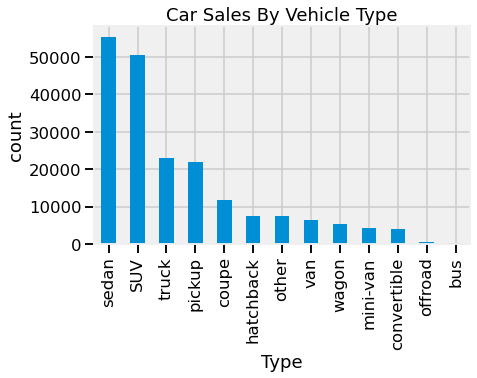

In [372]:
# Car sales by type

df.type.value_counts().plot.bar()
plt.xlabel('Type')
plt.ylabel('count')
plt.title('Car Sales By Vehicle Type')

Text(0.5, 1.0, 'Car Sales by Fuel')

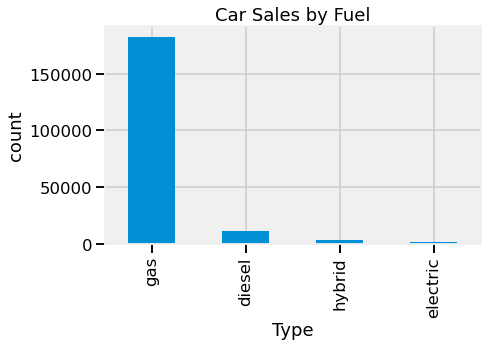

In [373]:
# cars sold Vs fuel
df.fuel.value_counts().plot.bar()
plt.xlabel('Type')
plt.ylabel('count')
plt.title('Car Sales by Fuel')

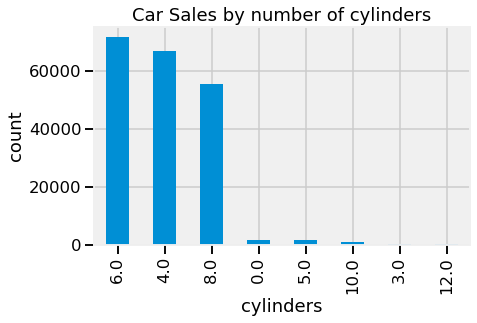

In [374]:
# cars sold Vs number of cylinders
df.cylinders.value_counts().plot.bar()
plt.xlabel('cylinders')
plt.ylabel('count')
plt.title('Car Sales by number of cylinders')
plt.show()


In [375]:
# cars sold by state
states = df.state.value_counts()
states

ca    20025
fl    12900
tx    10128
ny     9562
oh     8398
      ...  
ms      628
wv      520
de      495
wy      482
nd      381
Name: state, Length: 51, dtype: int64

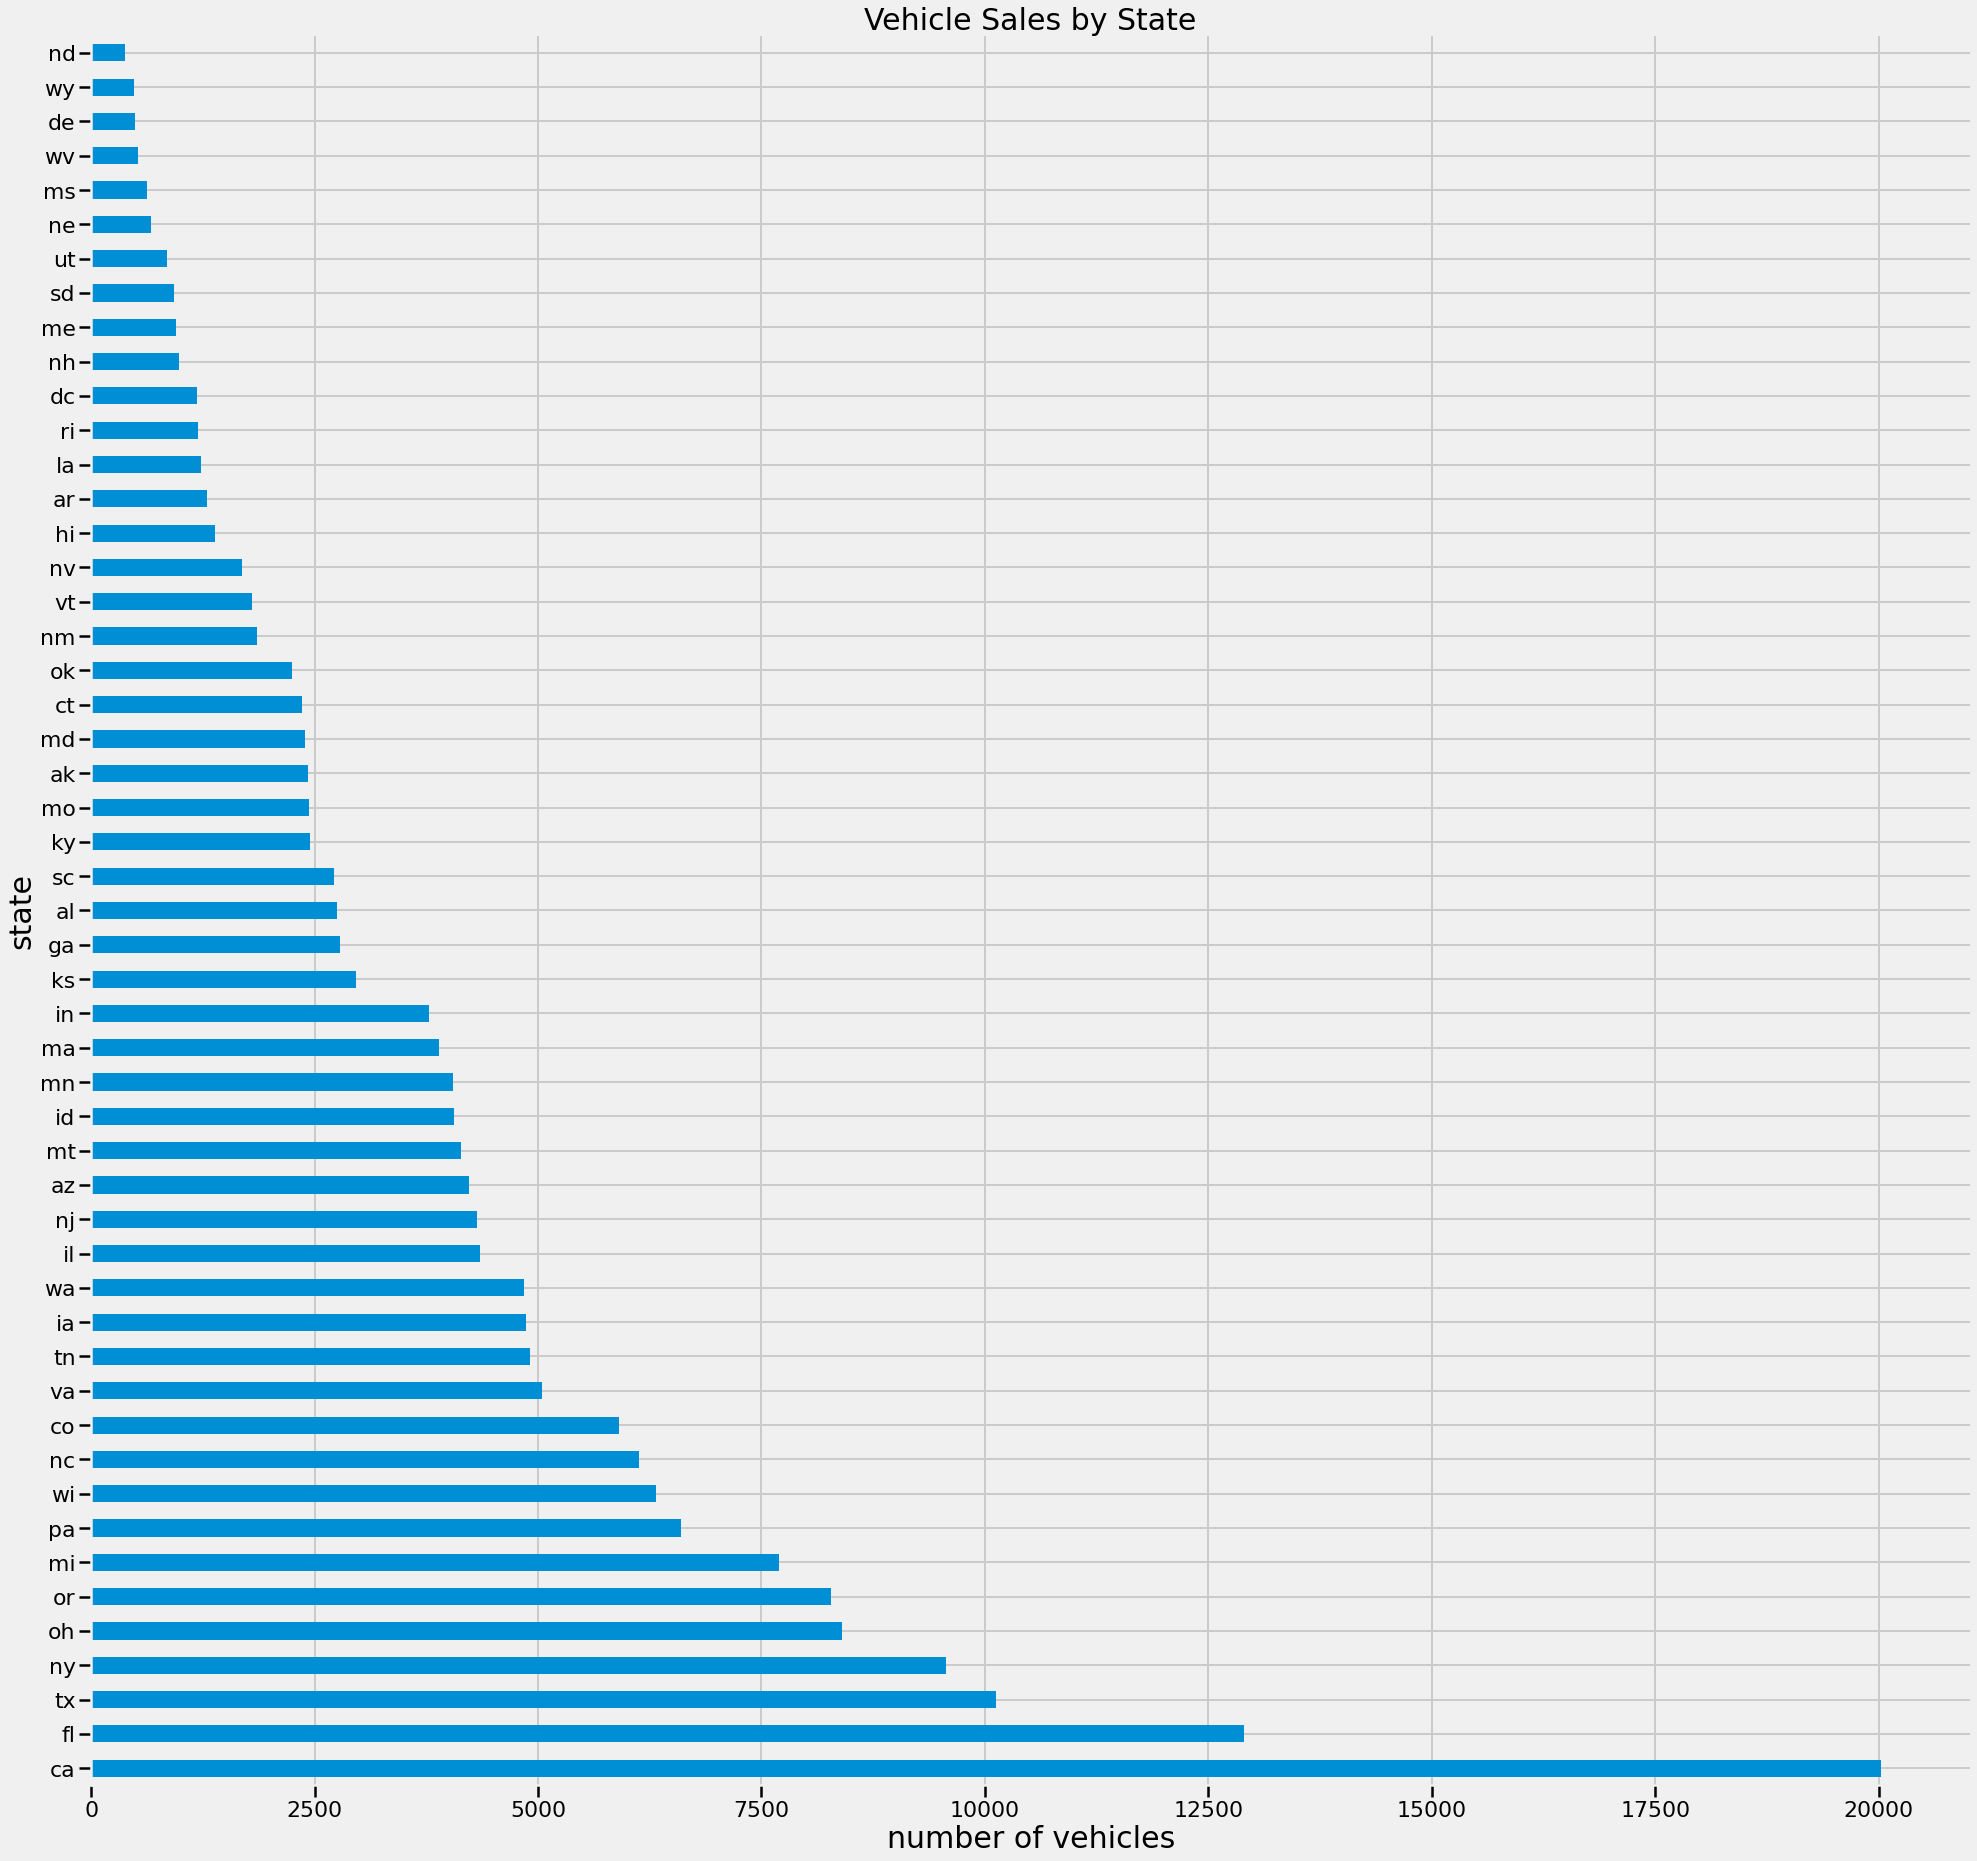

In [376]:
# bar plot cars sold vs state
plt.style.use('fivethirtyeight')
plt.figure(figsize = (30,30))
sns.set_context('poster')
states.plot.barh()
plt.ylabel('state', size = 30)
plt.xlabel('number of vehicles', fontsize = 30)
plt.title('Vehicle Sales by State', size = 30)
sns.despine(top = True, right = True)
plt.show()

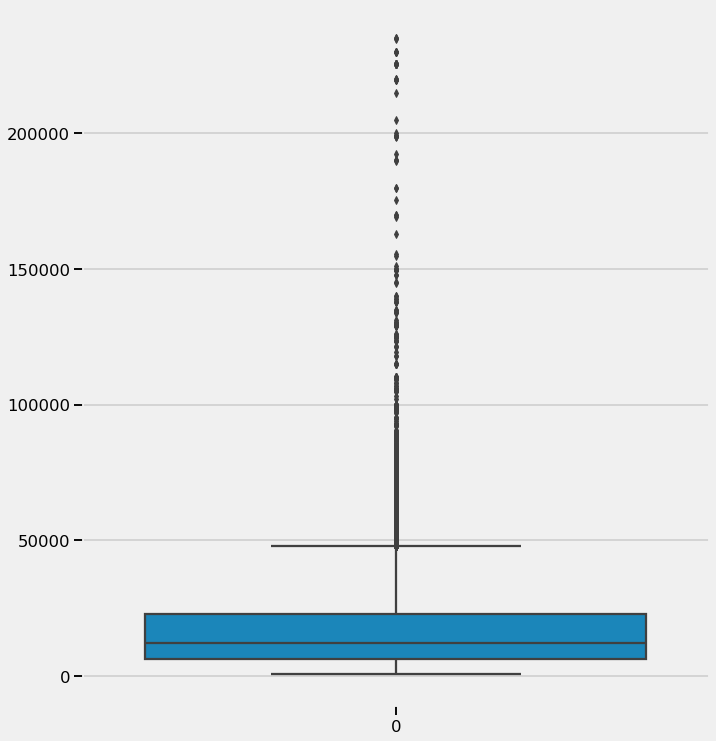

In [377]:
# boxplot price in dataset
plt.figure(figsize = (10,12))
sns.set_context('talk')
sns.boxplot(data = df.price)
plt.show()

In [378]:
# price quartiles
np.percentile(df.price, [25, 50,75, 100])

array([  6300.,  12000.,  22900., 235000.])

# Insght to Business Question

### Question - Which are the high value markets?


Location - top 5 states by sales volume are - ca, fl, tx, or, ny
 
Manufacture - ford, Chevrolet, Toyota, Honda are the top manufactures

Models - the best selling models are F150 , silverado 1500, 1500, camry, accord
 
fuel - gas vehicles sell more than desiel common with 6 cylinders out selling 4 & 8 cylinders.

Vehicles priced $10,500 - $20995 constitute 25 - 75 percentile of market.  





## Hypothesis testing


### Ho - The volume of cars traded in a state does not  affect vehicle price
### H1 - The volume of cars traded in a state affects vehicle price

In [379]:
a = df.state.value_counts()
pd.DataFrame(a)



,state
ca,20025
fl,12900
tx,10128
ny,9562
oh,8398
...,...
ms,628
wv,520
de,495
wy,482


In [380]:
a.median()

2749.0

In [381]:
# create a list of low sales volume states
low_sales = a[(a < 3160)]
low_index = low_sales.index
low_index

Index(['ks', 'ga', 'al', 'sc', 'ky', 'mo', 'ak', 'md', 'ct', 'ok', 'nm', 'vt',
       'nv', 'hi', 'ar', 'la', 'ri', 'dc', 'nh', 'me', 'sd', 'ut', 'ne', 'ms',
       'wv', 'de', 'wy', 'nd'],
      dtype='object')

In [382]:
# create a list of high sales volume sates
high_sales = a[a >= 3160]
high_index = high_sales.index
high_index

Index(['ca', 'fl', 'tx', 'ny', 'oh', 'or', 'mi', 'pa', 'wi', 'nc', 'co', 'va',
       'tn', 'ia', 'wa', 'il', 'nj', 'az', 'mt', 'id', 'mn', 'ma', 'in'],
      dtype='object')

In [383]:
# describe price statistic for high volume states sample
a_states = df[df.state.isin(high_index)]
a_sample = a_states.price.sample(2000)
a_sample.describe()

count      2000.000000
mean      15631.804000
std       13177.925762
min         500.000000
25%        5999.750000
50%       11965.000000
75%       21762.500000
max      133995.000000
Name: price, dtype: float64

In [384]:
#describe price statistic for low volume states sample
b_states = df[df.state.isin(low_index)]
b_sample = b_states.price.sample(2000)
b_sample.describe()

count      2000.000000
mean      16105.634500
std       12576.402175
min         509.000000
25%        6330.000000
50%       12605.500000
75%       22996.000000
max      109997.000000
Name: price, dtype: float64

In [385]:
a_states.price.describe()

count    154422.000000
mean      15919.693133
std       13264.781493
min         500.000000
25%        6200.000000
50%       11999.000000
75%       22499.000000
max      235000.000000
Name: price, dtype: float64

In [386]:
b_states.price.describe()

count     44096.000000
mean      16414.239568
std       13002.906025
min         500.000000
25%        6500.000000
50%       12900.000000
75%       23990.000000
max      235000.000000
Name: price, dtype: float64

C:\Users\dmuwa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dmuwa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


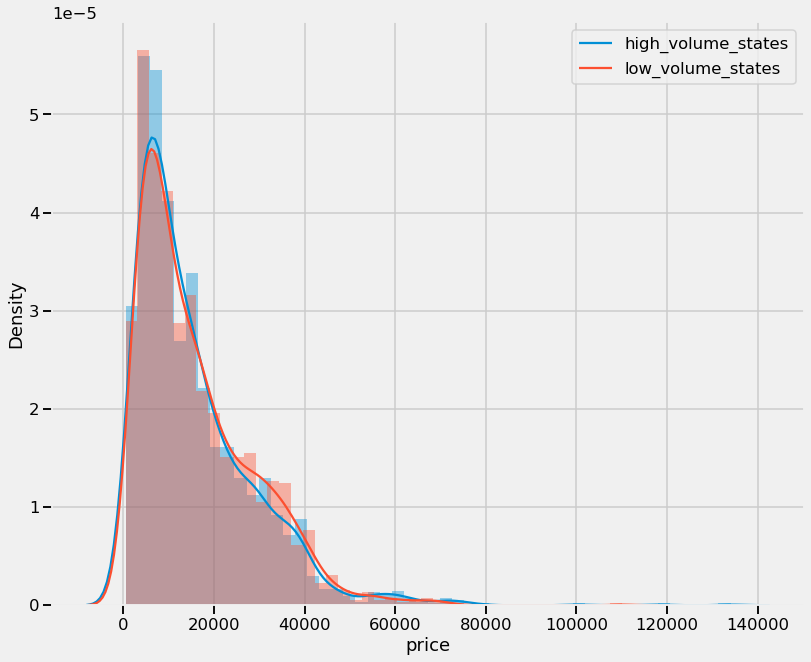

In [387]:
plt.figure(figsize = (12,10))

for a in [a_sample, b_sample]:
    sns.distplot(a, kde=True, )
    
plt.legend(labels = ['high_volume_states', 'low_volume_states'])

plt.show()


In [388]:
# hypothesis test (t - test) at 5% significance level
t2, p2 = stats.ttest_ind(a_sample, b_sample)
print(f"t ={t2}")
print(f"p = {p2}")


t =-1.1632802703819982
p = 0.2447852313983253


In [389]:
# p > 0.05 therefore we fail to reject Null hypothesis